<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13417 entries, 0 to 13416
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   13417 non-null  object 
 1   score_date                           13417 non-null  object 
 2   segment_smb                          13417 non-null  int64  
 3   segment_non_smb                      13417 non-null  int64  
 4   segment_commercial                   13417 non-null  int64  
 5   segment_enterprise                   13417 non-null  int64  
 6   segment_midmarket                    13417 non-null  int64  
 7   region_emea                          13417 non-null  int64  
 8   region_apac                          13417 non-null  int64  
 9   region_latam                         13417 non-null  int64  
 10  region_amer                          13417 non-null  int64  
 11  customer_age_quarters       

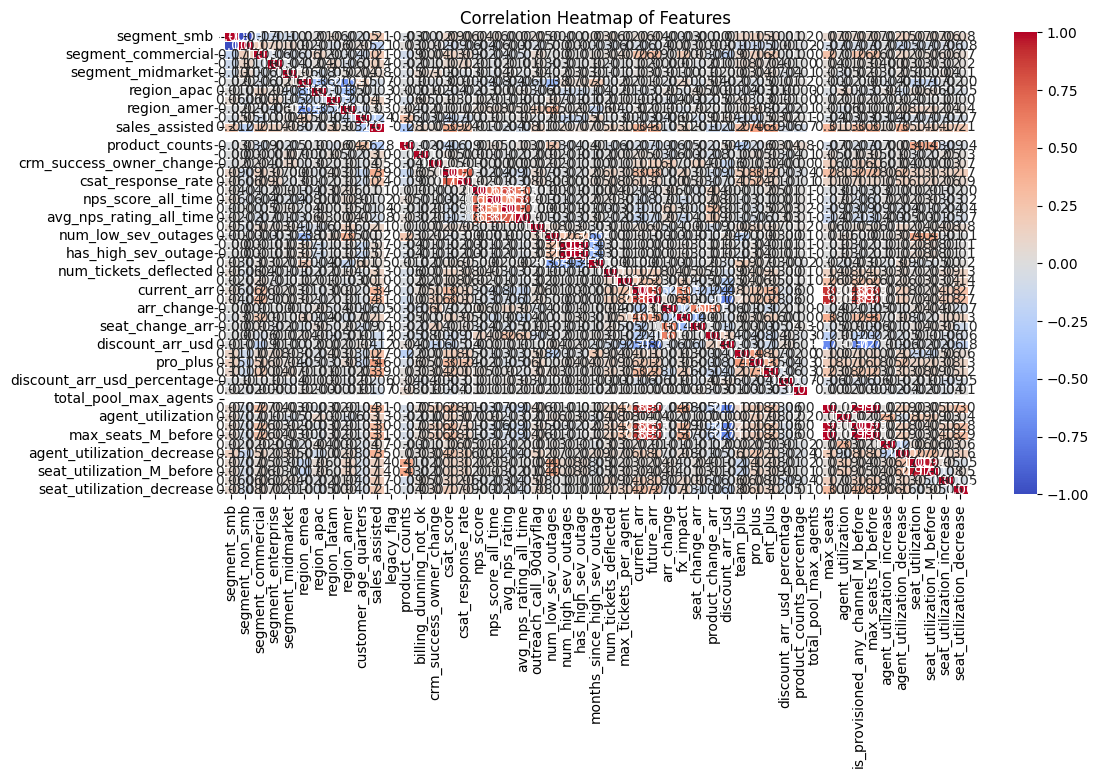

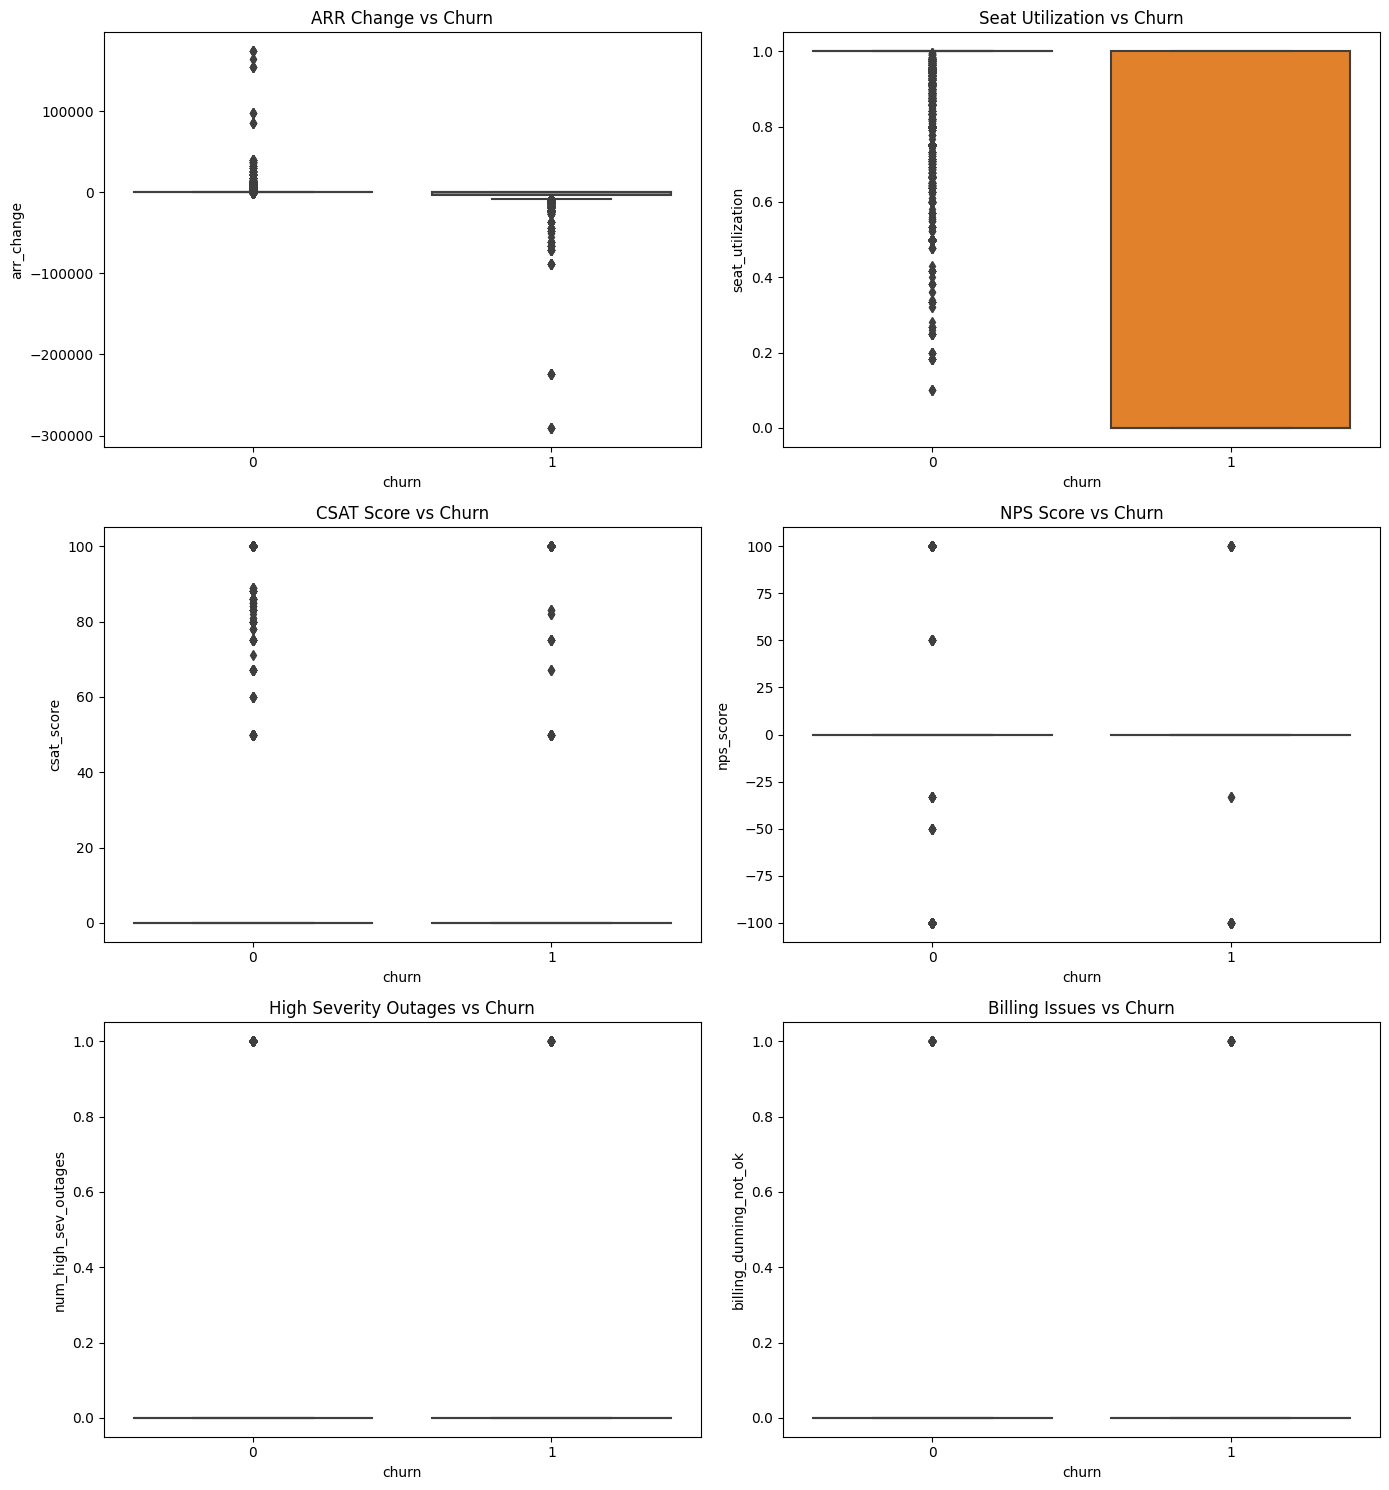

Top 10 Important Features:
 arr_change                             0.211243
seat_utilization                       0.201209
product_change_arr                     0.127882
seat_utilization_M_before              0.103539
seat_change_arr                        0.063290
is_provisioned_any_channel_M_before    0.045718
num_low_sev_outages                    0.042869
future_arr                             0.036408
max_tickets_per_agent                  0.028039
product_counts                         0.025234
dtype: float64
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[2130    0]
 [   0  554]]


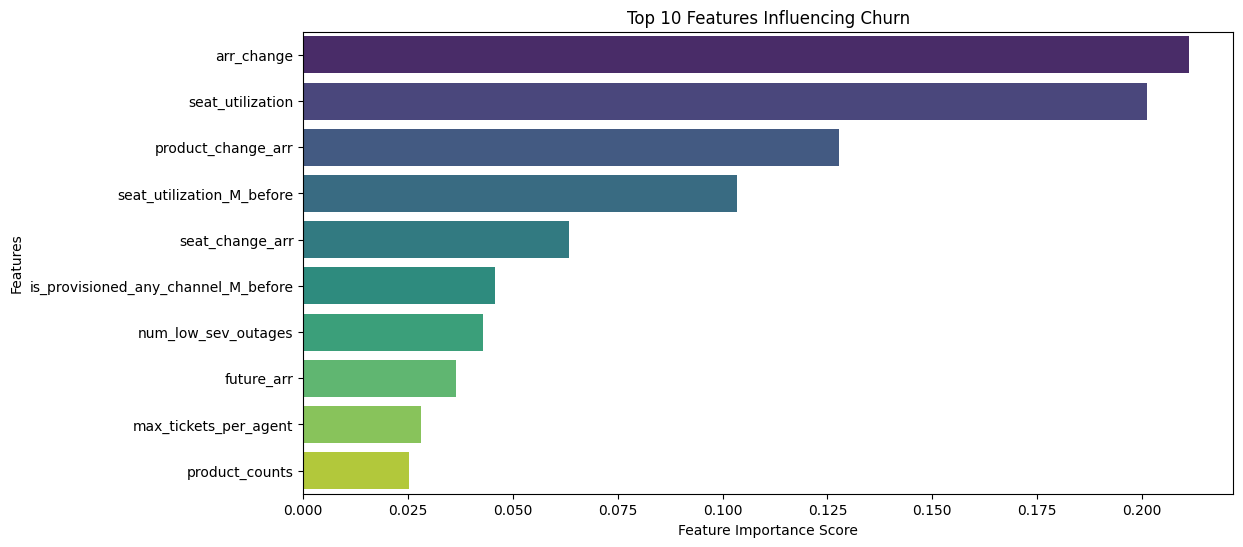

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load dataset
file_path = "final.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Display basic dataset info
df.info()
print(df.head())

# Handle missing values (if any)
df.fillna(0, inplace=True)

# Correlation Heatmap
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=["number"])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Features")
plt.show()

# Define churn (ARR decrease < -420 or zero seat utilization)
df["churn"] = ((df["arr_change"] < -420) | (df["seat_utilization"] == 0)).astype(int)

# Visualizing Key Hypothesis Distributions
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

sns.boxplot(x=df["churn"], y=df["arr_change"], ax=axes[0, 0])
axes[0, 0].set_title("ARR Change vs Churn")

sns.boxplot(x=df["churn"], y=df["seat_utilization"], ax=axes[0, 1])
axes[0, 1].set_title("Seat Utilization vs Churn")

sns.boxplot(x=df["churn"], y=df["csat_score"], ax=axes[1, 0])
axes[1, 0].set_title("CSAT Score vs Churn")

sns.boxplot(x=df["churn"], y=df["nps_score"], ax=axes[1, 1])
axes[1, 1].set_title("NPS Score vs Churn")

sns.boxplot(x=df["churn"], y=df["num_high_sev_outages"], ax=axes[2, 0])
axes[2, 0].set_title("High Severity Outages vs Churn")

sns.boxplot(x=df["churn"], y=df["billing_dunning_not_ok"], ax=axes[2, 1])
axes[2, 1].set_title("Billing Issues vs Churn")

plt.tight_layout()
plt.show()

# Encoding categorical features
excluded_cols = ["id", "score_date", "crm_industry_current", "crm_employee_range", "churn"]
features = df.drop(columns=excluded_cols)
label_encoders = {}
for col in features.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, df["churn"], test_size=0.2, random_state=42)

# Train a RandomForest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Top 10 Important Features:\n", feature_importances.head(10))

# Model Evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Bar Chart for Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.head(10), y=feature_importances.index[:10], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Features Influencing Churn")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13417 entries, 0 to 13416
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   13417 non-null  object 
 1   score_date                           13417 non-null  object 
 2   segment_smb                          13417 non-null  int64  
 3   segment_non_smb                      13417 non-null  int64  
 4   segment_commercial                   13417 non-null  int64  
 5   segment_enterprise                   13417 non-null  int64  
 6   segment_midmarket                    13417 non-null  int64  
 7   region_emea                          13417 non-null  int64  
 8   region_apac                          13417 non-null  int64  
 9   region_latam                         13417 non-null  int64  
 10  region_amer                          13417 non-null  int64  
 11  customer_age_quarters       

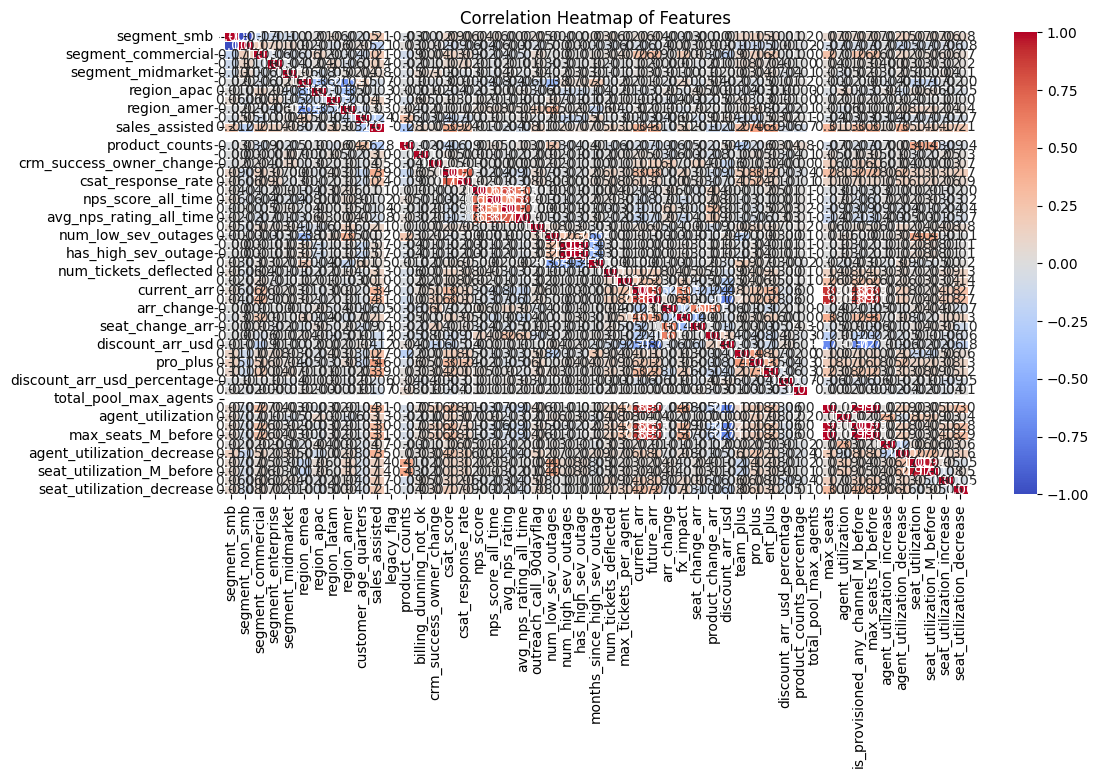

KeyError: 'arr_growth_recent'

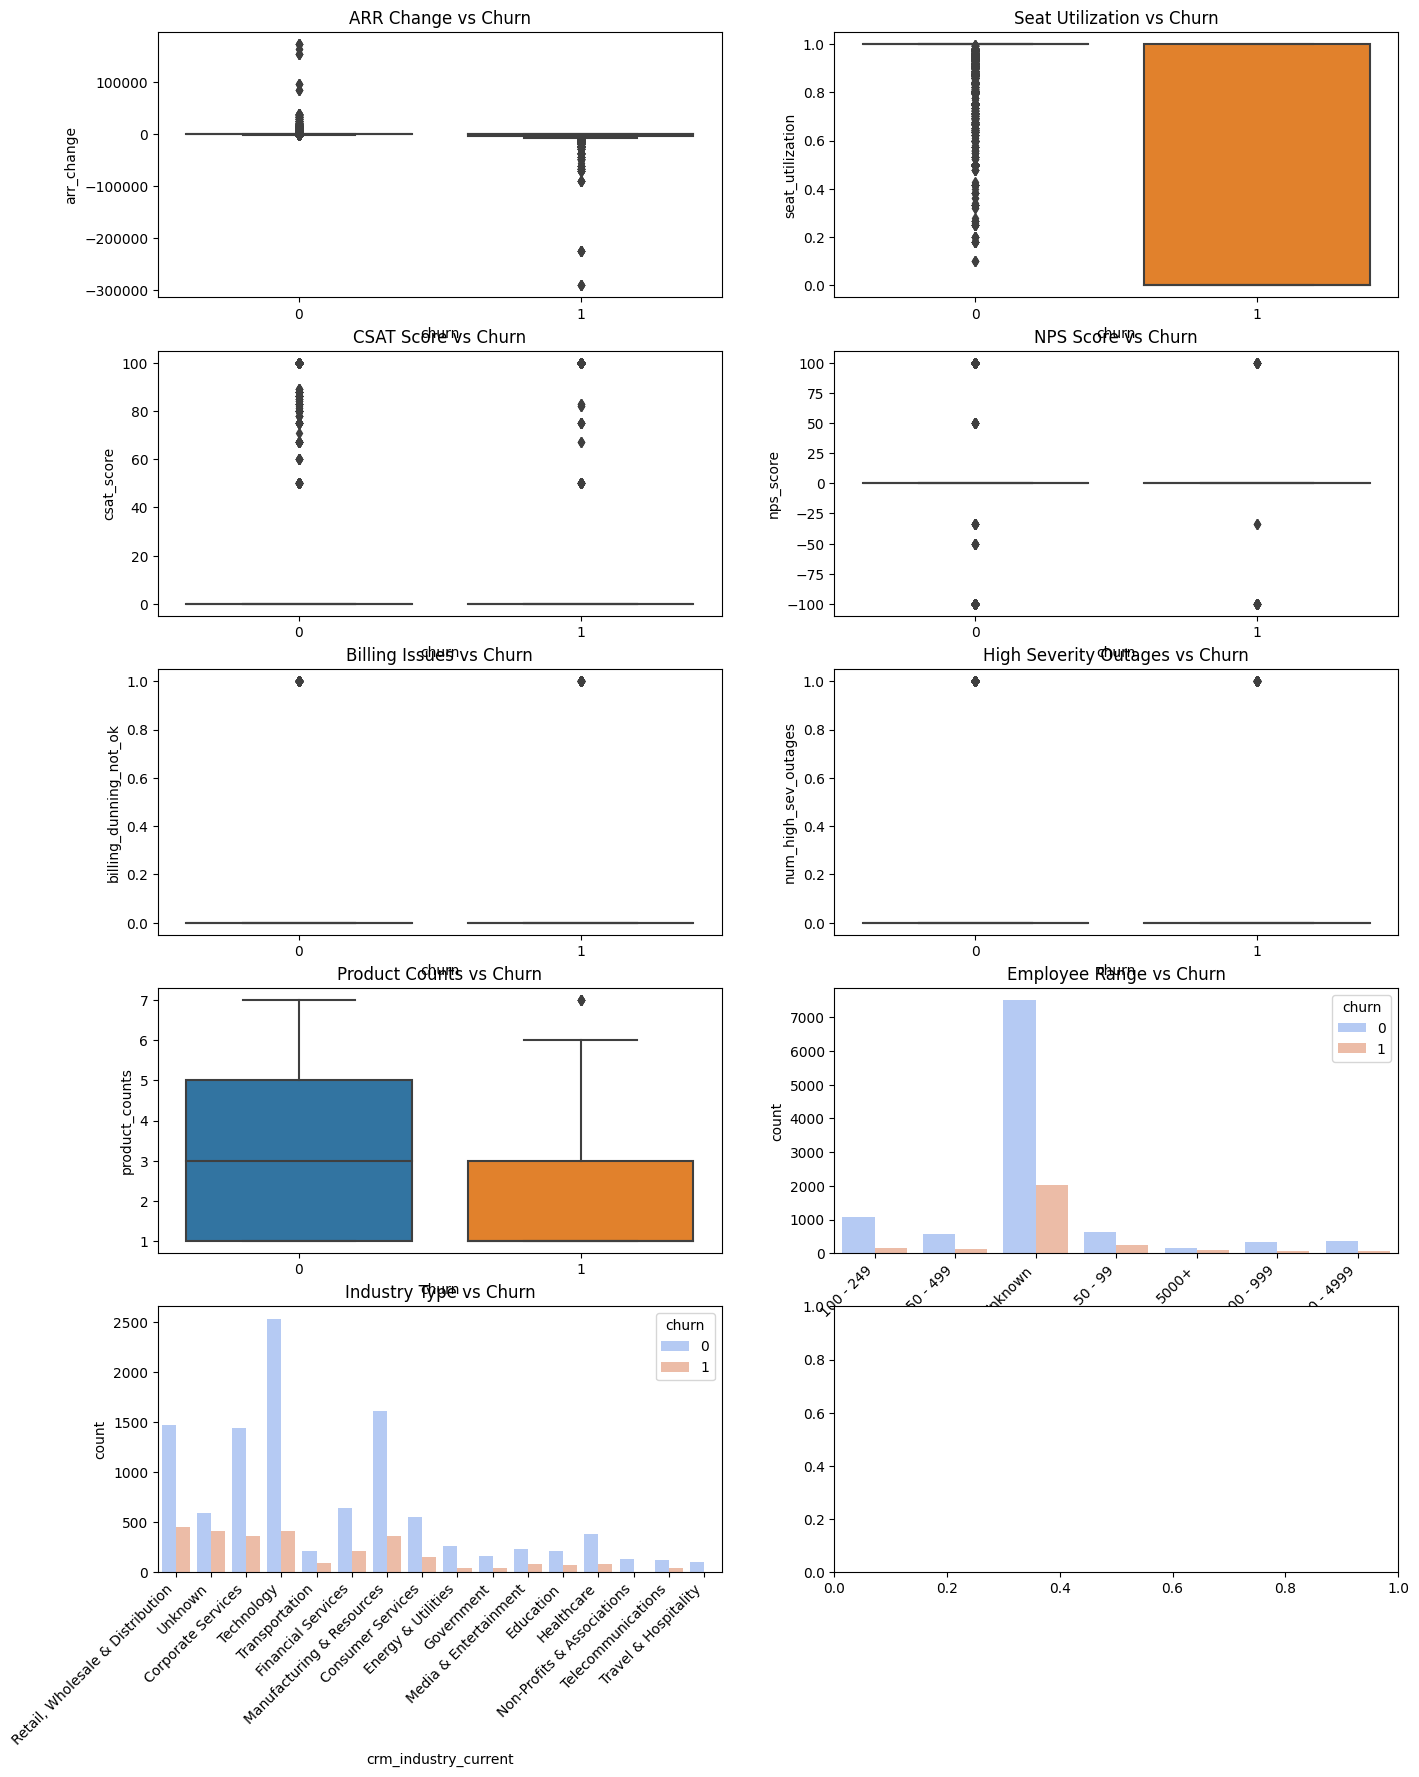

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load dataset
file_path = "final.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Display basic dataset info
df.info()
print(df.head())

# Handle missing values (if any)
df.fillna(0, inplace=True)

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=["number"])

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Define churn (ARR decrease < -420 or zero seat utilization)
df["churn"] = ((df["arr_change"] < -420) | (df["seat_utilization"] == 0)).astype(int)

# Visualizing Key Hypothesis Distributions
fig, axes = plt.subplots(5, 2, figsize=(16, 20))

hypotheses = [
    ("arr_change", "ARR Change vs Churn"),
    ("seat_utilization", "Seat Utilization vs Churn"),
    ("csat_score", "CSAT Score vs Churn"),
    ("nps_score", "NPS Score vs Churn"),
    ("billing_dunning_not_ok", "Billing Issues vs Churn"),
    ("num_high_sev_outages", "High Severity Outages vs Churn"),
    ("product_counts", "Product Counts vs Churn"),
    ("crm_employee_range", "Employee Range vs Churn"),
    ("crm_industry_current", "Industry Type vs Churn"),
    ("arr_growth_recent", "Recent ARR Growth vs Churn")
]

for i, (col, title) in enumerate(hypotheses):
    row, col_index = divmod(i, 2)
    if df[col].dtype == "object":
        sns.countplot(x=df[col], hue=df["churn"], ax=axes[row, col_index], palette="coolwarm")
        axes[row, col_index].set_xticklabels(axes[row, col_index].get_xticklabels(), rotation=45, ha="right")
    else:
        sns.boxplot(x=df["churn"], y=df[col], ax=axes[row, col_index])
    axes[row, col_index].set_title(title)

plt.tight_layout()
plt.show()

# Encoding categorical features
excluded_cols = ["id", "score_date", "crm_industry_current", "crm_employee_range", "churn"]
features = df.drop(columns=excluded_cols)
label_encoders = {}
for col in features.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, df["churn"], test_size=0.2, random_state=42)

# Train a RandomForest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Top 10 Important Features:\n", feature_importances.head(10))

# Model Evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Bar Chart for Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.head(10), y=feature_importances.index[:10], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Features Influencing Churn")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13417 entries, 0 to 13416
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   13417 non-null  object 
 1   score_date                           13417 non-null  object 
 2   segment_smb                          13417 non-null  int64  
 3   segment_non_smb                      13417 non-null  int64  
 4   segment_commercial                   13417 non-null  int64  
 5   segment_enterprise                   13417 non-null  int64  
 6   segment_midmarket                    13417 non-null  int64  
 7   region_emea                          13417 non-null  int64  
 8   region_apac                          13417 non-null  int64  
 9   region_latam                         13417 non-null  int64  
 10  region_amer                          13417 non-null  int64  
 11  customer_age_quarters       

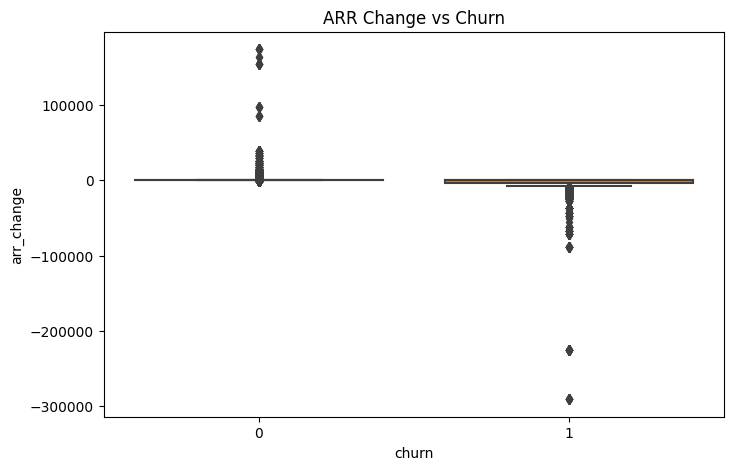

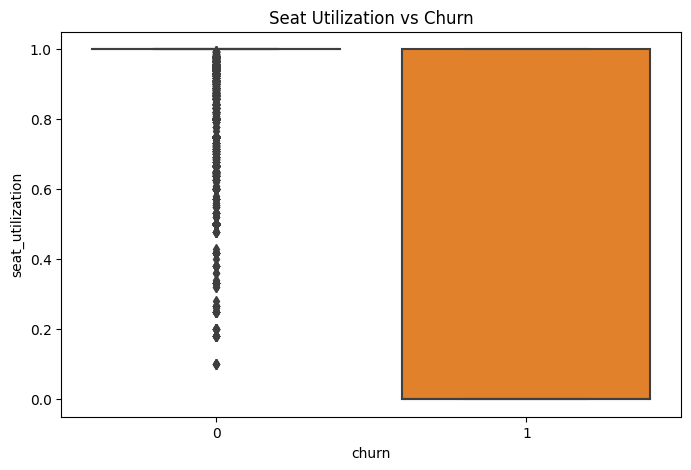

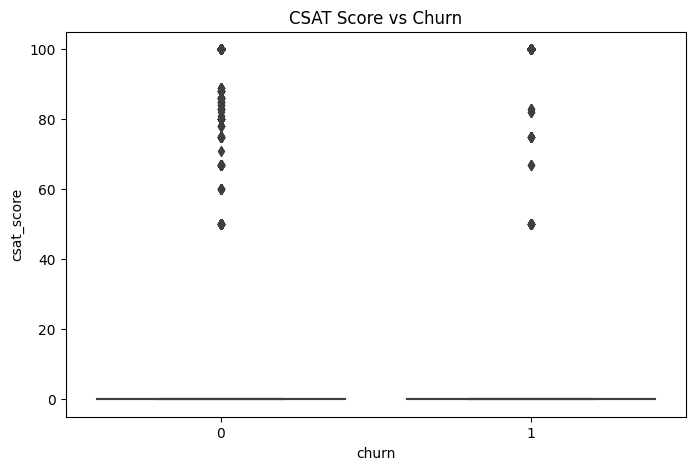

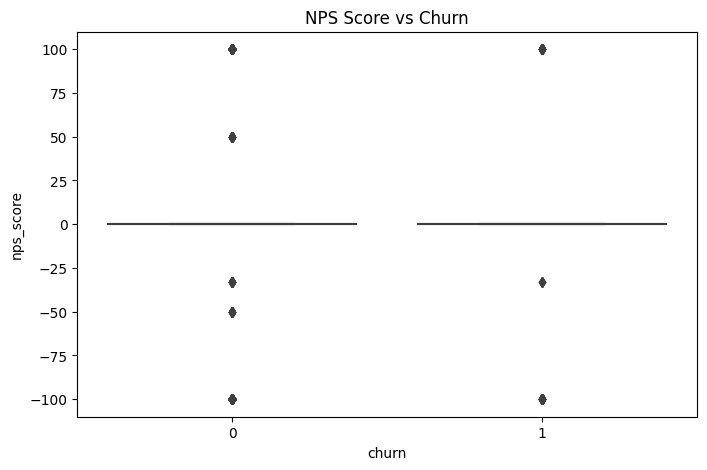

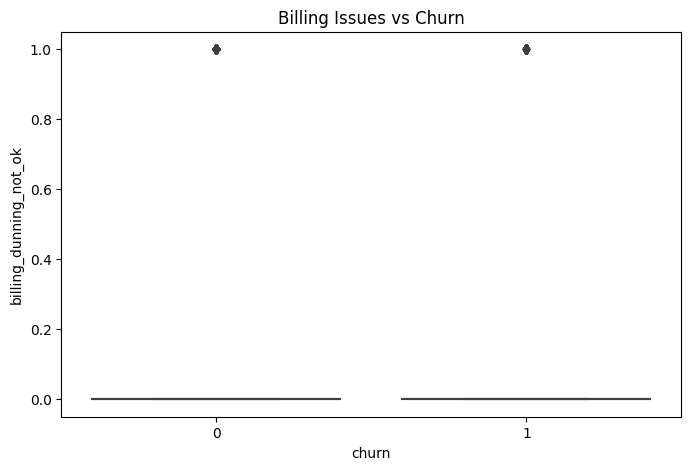

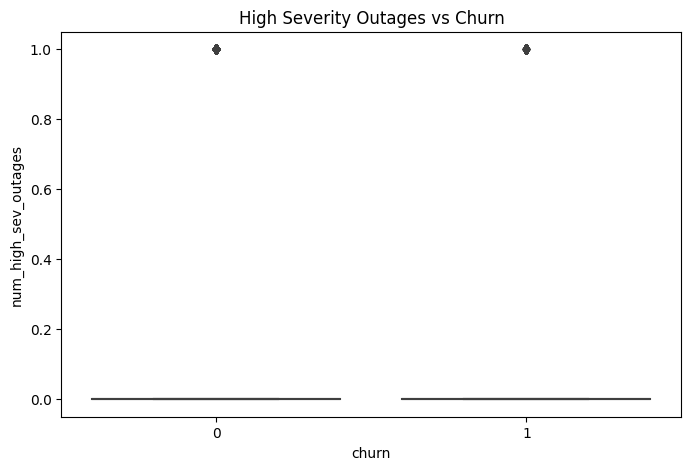

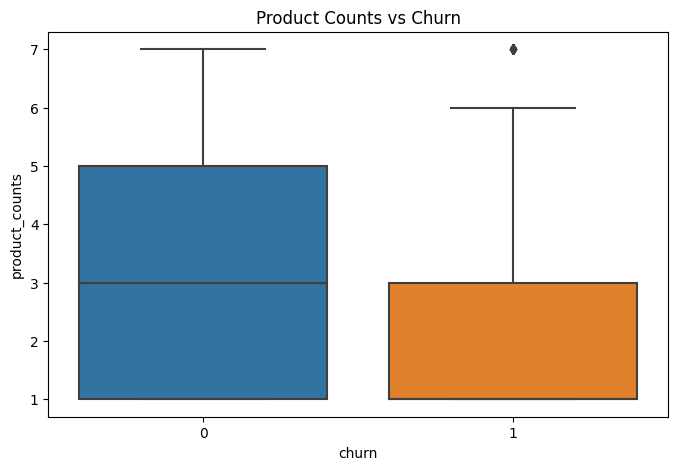

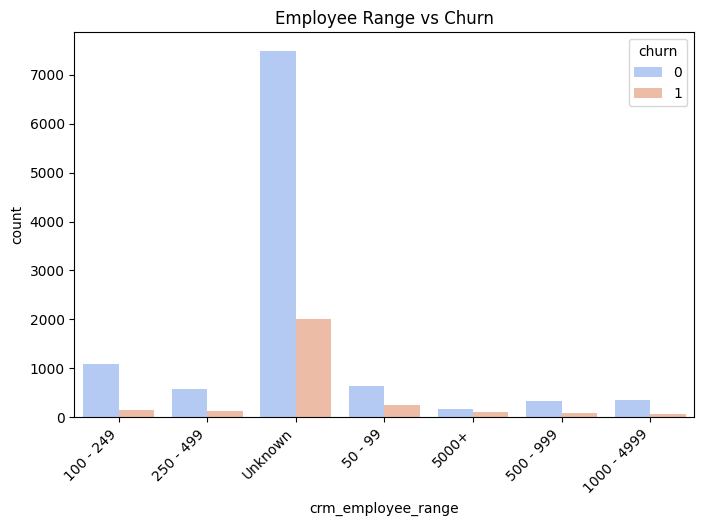

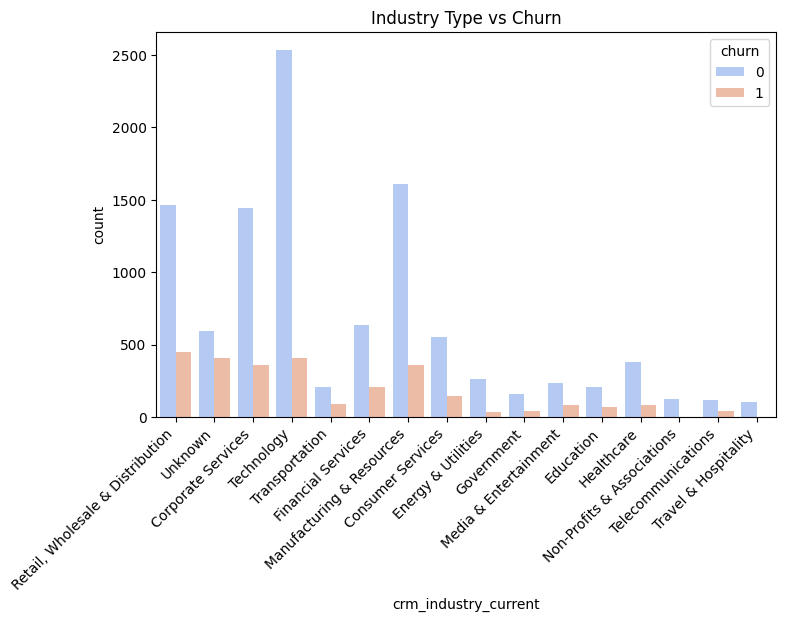

KeyError: 'arr_growth_recent'

<Figure size 800x500 with 0 Axes>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load dataset
file_path = "final.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Display basic dataset info
df.info()
print(df.head())

# Handle missing values (if any)
df.fillna(0, inplace=True)

# Select only numeric columns for correlation analysis
# numeric_df = df.select_dtypes(include=["number"])

# # Correlation Heatmap
# plt.figure(figsize=(15, 10))
# sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.xticks(rotation=45, ha="right")
# plt.yticks(rotation=0)
# plt.title("Correlation Heatmap of Features")
# plt.show()

# Define churn (ARR decrease < -420 or zero seat utilization)
df["churn"] = ((df["arr_change"] < -420) | (df["seat_utilization"] == 0)).astype(int)

# Visualizing Key Hypothesis Distributions
hypotheses = [
    ("arr_change", "ARR Change vs Churn"),
    ("seat_utilization", "Seat Utilization vs Churn"),
    ("csat_score", "CSAT Score vs Churn"),
    ("nps_score", "NPS Score vs Churn"),
    ("billing_dunning_not_ok", "Billing Issues vs Churn"),
    ("num_high_sev_outages", "High Severity Outages vs Churn"),
    ("product_counts", "Product Counts vs Churn"),
    ("crm_employee_range", "Employee Range vs Churn"),
    ("crm_industry_current", "Industry Type vs Churn"),
    ("arr_growth_recent", "Recent ARR Growth vs Churn")
]

for col, title in hypotheses:
    plt.figure(figsize=(8, 5))
    if df[col].dtype == "object":
        sns.countplot(x=df[col], hue=df["churn"], palette="coolwarm")
        plt.xticks(rotation=45, ha="right")
    else:
        sns.boxplot(x=df["churn"], y=df[col])
    plt.title(title)
    plt.show()

# Encoding categorical features
excluded_cols = ["id", "score_date", "crm_industry_current", "crm_employee_range", "churn"]
features = df.drop(columns=excluded_cols)
label_encoders = {}
for col in features.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, df["churn"], test_size=0.2, random_state=42)

# Train a RandomForest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Top 10 Important Features:\n", feature_importances.head(10))

# Model Evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Bar Chart for Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.head(10), y=feature_importances.index[:10], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Features Influencing Churn")
plt.show()


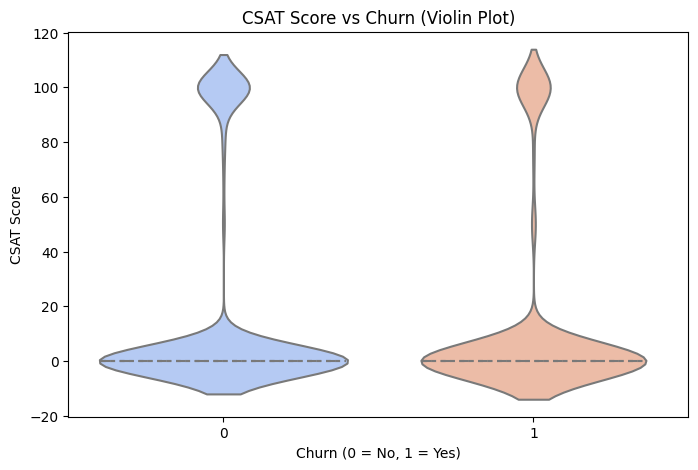

C:\Users\sathe\AppData\Local\Temp\ipykernel_16012\2633103903.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["churn"] == 0]["arr_change"], label="Not Churned", shade=True, color="blue")
C:\Users\sathe\AppData\Local\Temp\ipykernel_16012\2633103903.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["churn"] == 1]["arr_change"], label="Churned", shade=True, color="red")


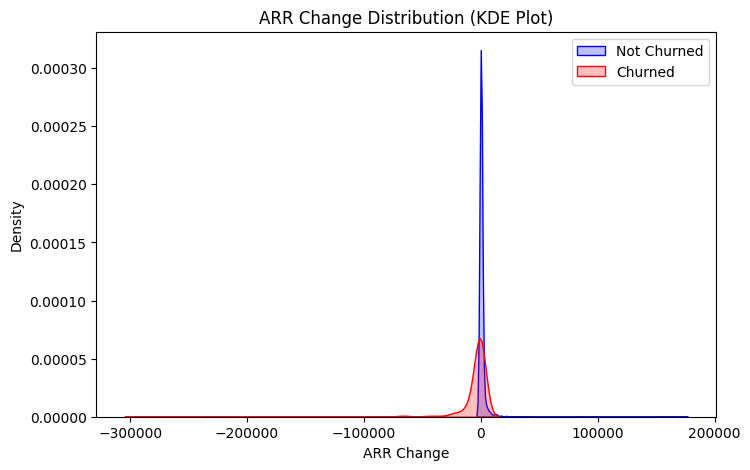

C:\Users\sathe\AppData\Local\Temp\ipykernel_16012\2633103903.py:20: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=df["churn"], y=df["seat_utilization"], palette="coolwarm")


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df["churn"], y=df["csat_score"], palette="coolwarm", inner="quartile")
plt.title("CSAT Score vs Churn (Violin Plot)")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("CSAT Score")
plt.show()

# 2. KDE Plot - ARR Change Distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["churn"] == 0]["arr_change"], label="Not Churned", shade=True, color="blue")
sns.kdeplot(df[df["churn"] == 1]["arr_change"], label="Churned", shade=True, color="red")
plt.title("ARR Change Distribution (KDE Plot)")
plt.xlabel("ARR Change")
plt.ylabel("Density")
plt.legend()
plt.show()

# 3. Swarm Plot - Seat Utilization vs Churn
plt.figure(figsize=(8, 5))
sns.swarmplot(x=df["churn"], y=df["seat_utilization"], palette="coolwarm")
plt.title("Seat Utilization vs Churn (Swarm Plot)")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Seat Utilization")
plt.show()

# 4. Stacked Bar Chart - Billing Issues vs Churn
plt.figure(figsize=(8, 5))
df_grouped = df.groupby("billing_dunning_not_ok")["churn"].value_counts(normalize=True).unstack()
df_grouped.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8, 5))
plt.title("Billing Issues vs Churn (Stacked Bar Chart)")
plt.xlabel("Billing Issues (0 = No, 1 = Yes)")
plt.ylabel("Proportion of Churn")
plt.legend(title="Churn (0 = No, 1 = Yes)")
plt.show()